# House Price Prediction

김민영


# Contents

0. [Set Up](#introduction)


1. [EDA](#paragraph1)
    1. [Target 변수 분석](#subparagraph1)
    2. [설명변수 분석](#subparagraph2) (cotinuous/categorical/time/location)
    3. [상관관계 파악](#subparagraph3) (cotinuous/categorical/time/location) - (price)
    
2. [Preprocessing](#paragraph2)
    1. [결측값 처리](#subparagraph1)
    2. [이상치 제거](#subparagraph2)


3. [변수 생성](#paragraph3)


4. [Modeling](#paragraph4)
    1. [simple linear regression](#subparagraph1)
    2. [lightgbm](#subparagraph2)
    3. [Ensemble](#subparagraph3)

# 0. Set Up

In [1]:
# directory 
import os
get_dir = os.getcwd()
print(get_dir)

C:\Users\KimMinyoung\Desktop\보아즈 베이스\1주차 멘토멘티


In [2]:
# library import

# Analysis
import pandas as pd 
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import scipy as sp

# Visualize
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# modeling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV


# warning message ignore
import warnings 
warnings.filterwarnings('ignore')

# memory allocation
import gc # garbage collection

In [3]:
# read df_train
df_train = pd.read_csv(get_dir+'/null_train.csv')
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,NaN
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819.0
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711.0


### Data :  House Price Prediction 
https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/data

- 집의 정보를 가지고 **가격**을 예측하는 **회귀문제**  
**<칼럼 설명>**      
ID : 집을 구분하는 번호  
date : 집을 구매한 날짜  
price : 집의 가격(Target variable)  
bedrooms : 침실의 수  
bathrooms : 화장실의 수  
sqft_living : 주거 공간의 평방 피트(면적)  
sqft_lot : 부지의 평방 피트(면적)  
floors : 집의 층 수  
waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)  
view : Has been viewed  
condition : 집의 전반적인 상태  
grade : King County grading 시스템 기준으로 매긴 집의 등급  
sqft_above : 지하실을 제외한 평방 피트(면적)  
sqft_basement : 지하실의 평방 피트(면적)  
yr_built : 지어진 년도  
yr_renovated : 집을 재건축한 년도  
zipcode : 우편번호  
lat : 위도  
long : 경도  
sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)  
sqft_lot15 : 2015년 기준 부지 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있  

# 1. EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [5]:
df_train.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15       1503
dtype: int64

-> sqft_lot15 에서 결측값이 존재한다. 따라서 이 결측값들을 2.1절에서 채워넣어 줄 것이다.

In [6]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,13532.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12780.115504
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27821.835601
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5098.250000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7588.500000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10035.750000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 1.1 Target 변수 분석

In [7]:
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [8]:
df_train['price'].sort_values(ascending=False).head()

5108    7700000.0
2775    7062500.0
6469    6885000.0
3134    5570000.0
1045    5350000.0
Name: price, dtype: float64

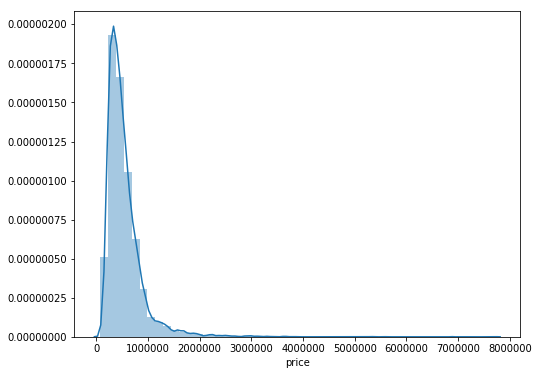

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

-> 상당히 왼쪽으로 skewed 된 분포이다. skewnewss 와 kurtosis를 통해 자세히 살펴보자.

In [10]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 4.290252
Kurtosis: 40.154919


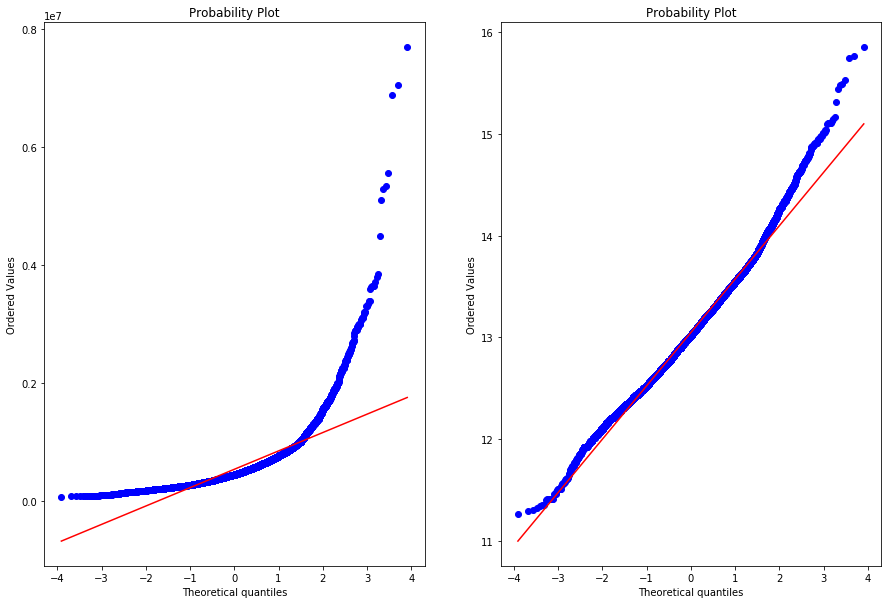

In [11]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

log 값을 취해주면 더 정규분포에 가깝게 만들어 줄 수 있다.

* qqplot : 빨간 직선에 가까울 수록 정규성 만족

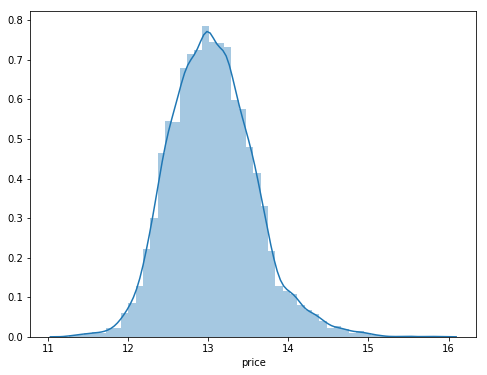

In [12]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

## 1.2 설명변수 분포확인

각 변수에 알맞는 plot을 한꺼번에 찍어내기 위해 categorical, continuous, time, location으로 나누었다.

In [13]:
categorical = ['bedrooms', 'bathrooms','grade','view','waterfront','condition','floors']
continuous=['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']
time = ['date','yr_renovated','yr_built']
location=['lat', 'long']
etc = ['id','zipcode']

### Continuous Variables 분포확인 (histogram)

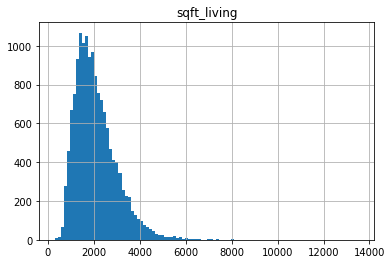

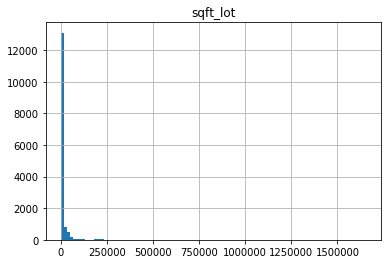

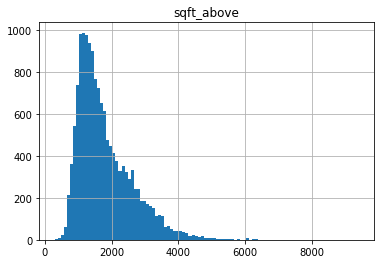

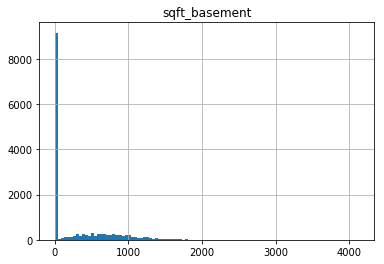

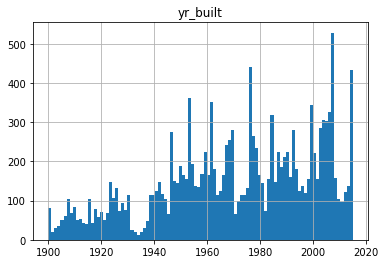

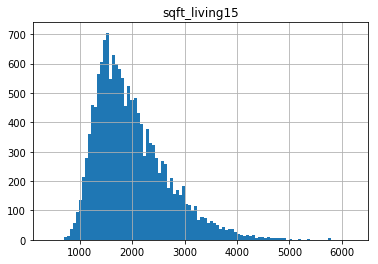

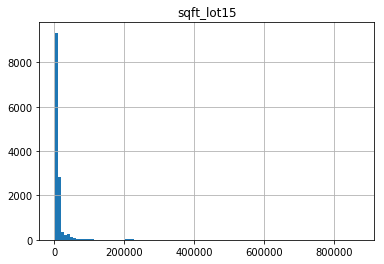

In [14]:
for i in range(len(continuous)):
    plt.title(continuous[i])
    df_train[continuous[i]].hist(bins=100)
    plt.show()

### Categorical Variables 분포확인 (count plot)

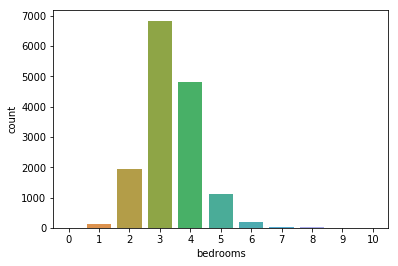

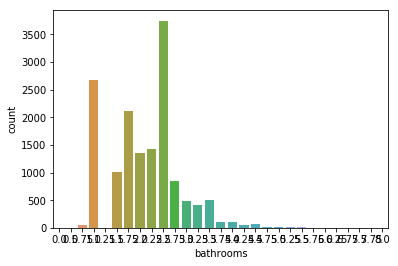

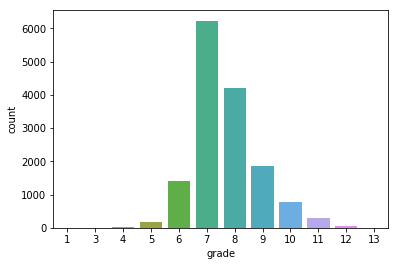

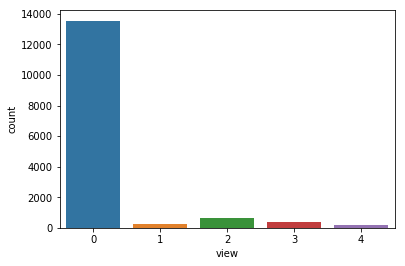

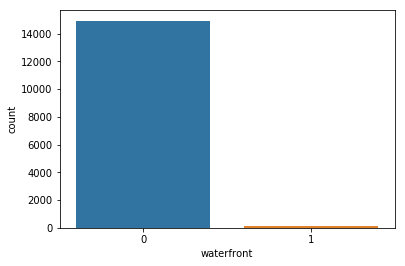

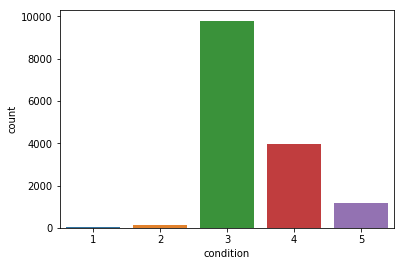

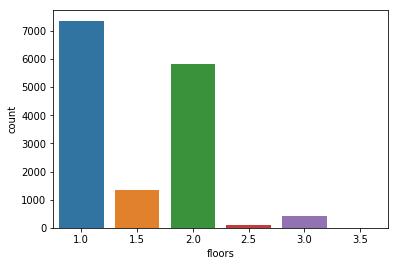

In [15]:
for i in range(len(categorical)):
    ax = sns.countplot(x=categorical[i], data=df_train)
    plt.show()

### date 관련 변수들 분포확인

In [16]:
temp=df_train.copy()

In [17]:
date = pd.to_datetime(temp['date'].str.slice(0,8),format='%Y-%m-%d')
temp['date']=date

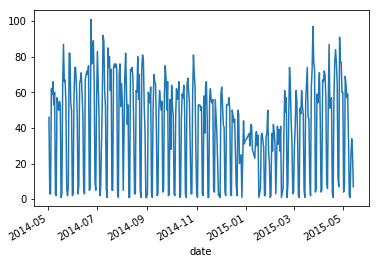

In [20]:
grouped = temp.groupby('date')
grouped['id'].count().plot()

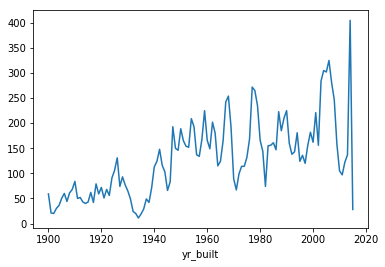

In [21]:
grouped = temp.groupby('yr_built')
grouped['id'].count().plot()

### location 관련 변수들 분포 확인

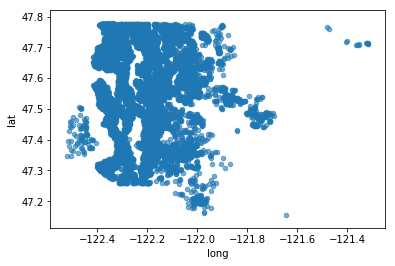

In [22]:
df_train.plot(kind='scatter',x='long',y='lat',alpha=0.6)
plt.show()
# -> 특정 지역 근처에 집값이 높음

## 1.3 상관관계 파악

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


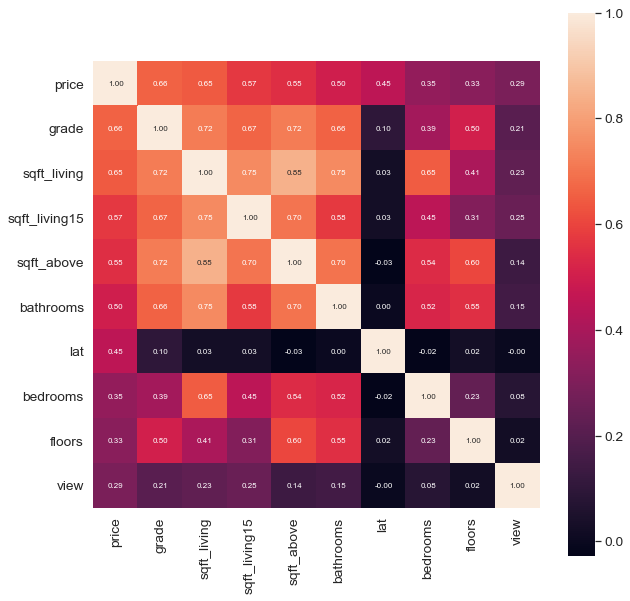

In [23]:
cor_abs = abs(df_train.corr(method='spearman')) # 반비례관계도 고려하기위해 절대값 사용
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

### Continuous varibles 와 Price와의 Plot

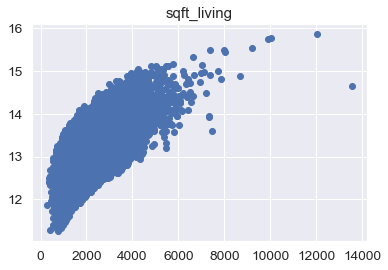

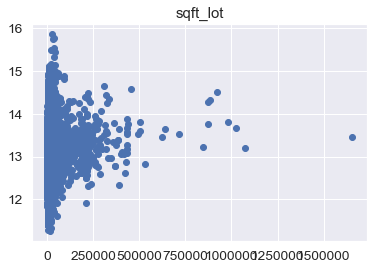

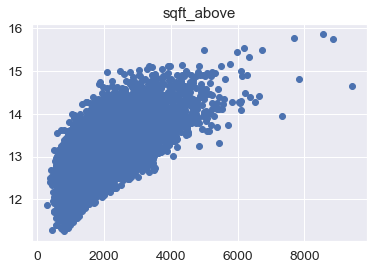

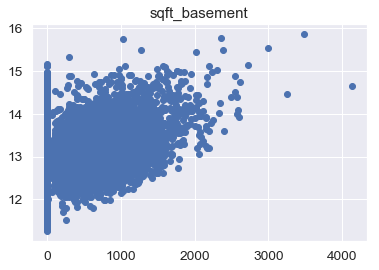

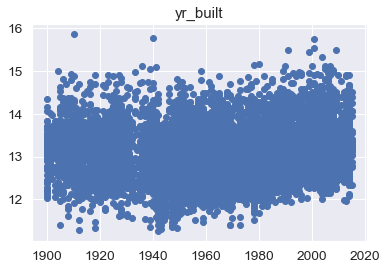

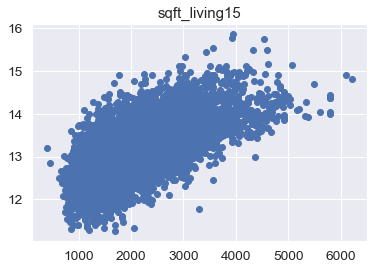

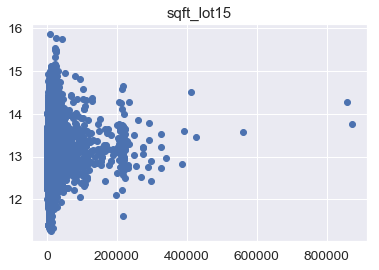

In [24]:
for i in range(len(continuous)):
    plt.title(continuous[i])
    plt.scatter(df_train[continuous[i]],df_train['price'])
    plt.show()

### Categorical Variables - Price와의 plot

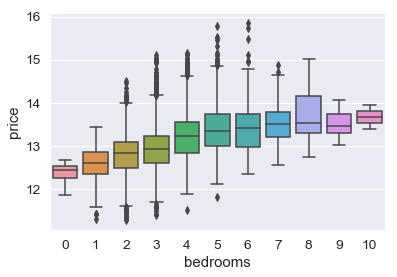

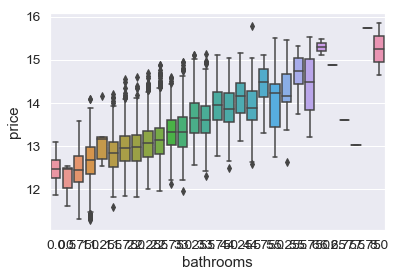

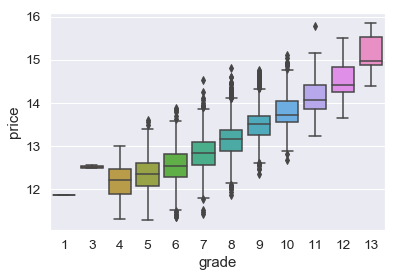

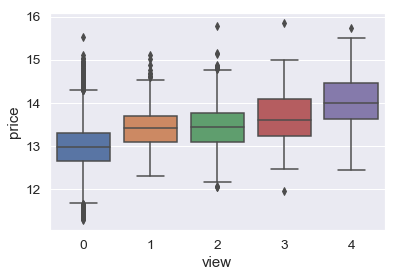

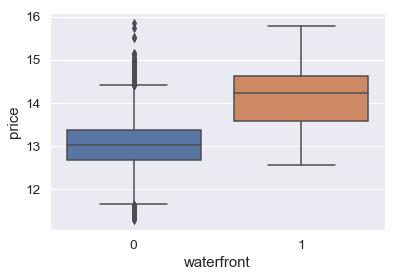

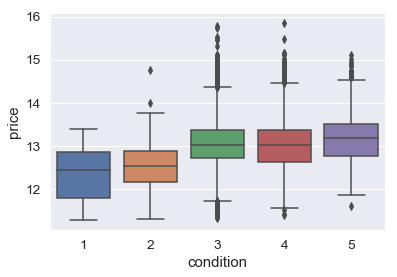

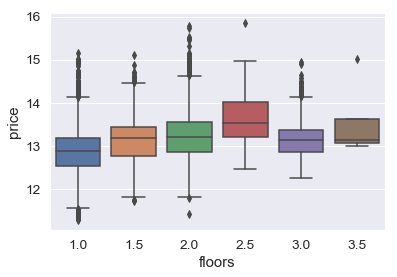

In [25]:
for i in range(len(categorical)):
    sns.boxplot(x=df_train[categorical[i]], y='price', data=df_train)
    plt.show()

### 날짜 - Price 관계 파악

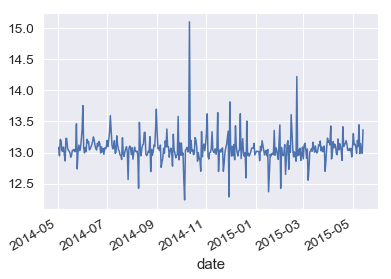

In [26]:
grouped = temp.groupby('date')
grouped['price'].mean().plot()

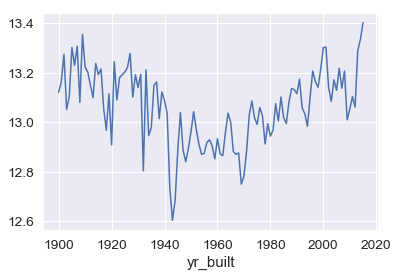

In [27]:
grouped = temp.groupby('yr_built')
grouped['price'].mean().plot()

### 위치 - Price 관계 파악

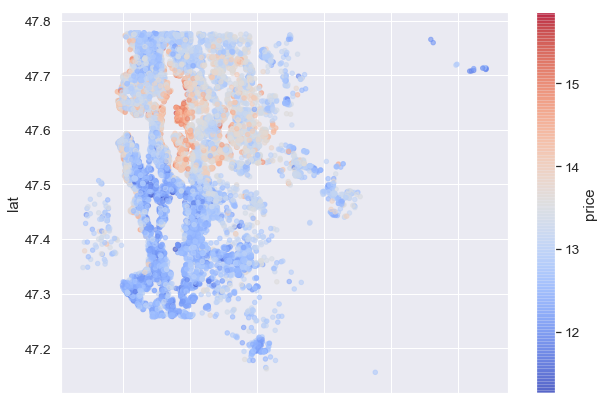

In [28]:
df_train.plot(kind='scatter',x='long',y='lat',alpha=0.6,figsize=(10,7),c='price',cmap=plt.get_cmap('coolwarm'),colorbar=True)
plt.show()
# -> 특정 지역 근처에 집값이 높음

# 2. Preprocessing

## 2.1 결측값 처리

1절에서 살펴봤듯이, sqft_lot15의 결측값이 1503개가 존재했다. 따라서 이들의 값을 채워넣기 위해 자세히 살펴볼 예정이다.

In [29]:
df_train.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15       1503
dtype: int64

우선, 특별한 값에서 결측값이 존재하는지 확인해보기 위해 결측값이 존재하는 행들만 따로 뽑아와 살펴보았다.

In [30]:
df_train[df_train.isnull().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,2,20150218T000000,13.142168,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,NaN
15,15,20140514T000000,12.861001,4,1.75,1620,4980,1.0,0,0,...,7,860,760,1947,0,98133,47.7025,-122.341,1400,NaN
18,18,20141120T000000,12.703816,3,2.25,2450,6500,2.0,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,NaN
20,20,20140626T000000,13.750440,3,1.75,2450,2691,2.0,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,NaN
29,29,20140620T000000,13.312985,4,2.50,2620,7553,2.0,0,0,...,8,2620,0,1996,0,98056,47.5301,-122.180,2620,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14978,14978,20141211T000000,12.821261,4,2.50,2531,6843,2.0,0,0,...,8,2531,0,2013,0,98030,47.3850,-122.189,2604,NaN
14982,14982,20150410T000000,12.906007,3,2.75,1160,1073,2.0,0,0,...,7,880,280,2007,0,98144,47.5788,-122.315,1250,NaN
14983,14983,20150227T000000,13.480039,4,3.25,2630,7770,2.0,0,0,...,9,2630,0,2014,0,98126,47.5459,-122.377,1370,NaN
15001,15001,20141009T000000,13.270699,5,2.75,3080,5752,2.0,0,0,...,9,3080,0,2014,0,98059,47.4922,-122.153,3000,NaN


기존의 describe와 비교를 통해, 특별한 점이 있었는지 찾아보았으나 특별한 점은 발견되지 않았다.

In [31]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,13532.000000
mean,7517.000000,13.048122,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12780.115504
std,4340.374984,0.527471,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27821.835601
min,0.000000,11.264477,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,12.682310,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5098.250000
50%,7517.000000,13.017005,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7588.500000
75%,11275.500000,13.377007,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10035.750000
max,15034.000000,15.856731,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [32]:
df_train[df_train.isnull().any(axis=1)].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,0.0
mean,7657.904192,13.041113,3.368596,2.107784,2087.027944,15392.128410,1.490020,0.005323,0.188955,3.421823,7.675316,1793.049900,293.978044,1971.552894,73.077844,98078.117764,47.560034,-122.216907,1990.049900,NaN
std,4382.853209,0.525154,0.898215,0.759774,906.216104,35233.271697,0.536516,0.072787,0.701120,0.642774,1.172122,827.312216,434.556955,29.099873,375.099802,52.950962,0.139950,0.138094,665.457169,NaN
min,2.000000,11.407020,1.000000,0.750000,520.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,480.000000,0.000000,1900.000000,0.000000,98001.000000,47.193700,-122.506000,760.000000,NaN
25%,3915.000000,12.660333,3.000000,1.625000,1430.000000,5120.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1953.000000,0.000000,98033.000000,47.467800,-122.328500,1500.000000,NaN
50%,7748.000000,13.017005,3.000000,2.250000,1930.000000,7808.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98070.000000,47.569700,-122.237000,1870.000000,NaN
75%,11402.500000,13.384729,4.000000,2.500000,2540.000000,11069.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,560.000000,1996.500000,0.000000,98117.000000,47.680300,-122.126500,2365.000000,NaN
max,15015.000000,15.106120,8.000000,6.750000,7480.000000,493534.000000,3.000000,1.000000,4.000000,5.000000,13.000000,7320.000000,2590.000000,2015.000000,2014.000000,98199.000000,47.776200,-121.319000,5500.000000,NaN


따라서 sqft_lot15와 관련성이 높은 sqft_lot 변수를 통해 우선 결측값을 처리해보도록 한다. 재개발이 되지 않았을 경우, sqft_lot과 sqft_lot15의 값은 같다. 이를 데이터로 확인해보자.

### 재건축이 됐을 경우 sqft_lot15와 sqft_lot 비교

In [33]:
is_renovated=df_train[df_train['yr_renovated']>0]
not_renovated=df_train[df_train['yr_renovated']==0]

In [34]:
is_renovated[['sqft_lot','sqft_lot15']]

,sqft_lot,sqft_lot15
26,3060,3264.0
78,6350,6350.0
149,33474,20953.0
160,15798,13193.0
166,4740,4740.0
...,...,...
13626,18000,31294.0
13641,6000,4800.0
13952,5040,8710.0
14218,9612,NaN


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


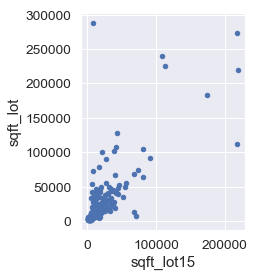

In [35]:
is_renovated.plot(x='sqft_lot15',y='sqft_lot',kind='scatter')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

### 재건축이 안 됐을 경우 sqft_lot15와 sqft_lot 비교

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


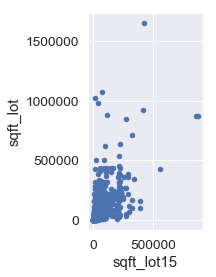

In [36]:
not_renovated.plot(x='sqft_lot15',y='sqft_lot',kind='scatter')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

...? 캐글에 적혀있는 변수 설명대로라면 재개발 안 되었을 경우에는 sqft_lot이랑 sqft_lot15랑 같아야되는거 아닌가...? 다 같을줄알고 이걸로 결측값처리하려고 했는데 일단 제일 비슷한 값이니까 이걸로 넣자. 근데 이걸로 결측값 처리해도 되는건가.. 아님 그냥 imputer 쓸까...

In [37]:
na = df_train[df_train.isnull().any(axis=1)]
na['sqft_lot15']=na['sqft_lot']
df_train[df_train.isnull().any(axis=1)]=na

In [38]:
df_train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### sol2) Imputer 사용

In [39]:
# from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")

## 2.2 이상치 제거

위에서 분포 시각화를 통해, sqft_living, grade, bedrooms 변수들에 대해 이상치가 있는 것을 확인할 수 있었다. 따라서 이들을 자세히 살펴볼 예정이다.

### 2.2.1 sqft_living

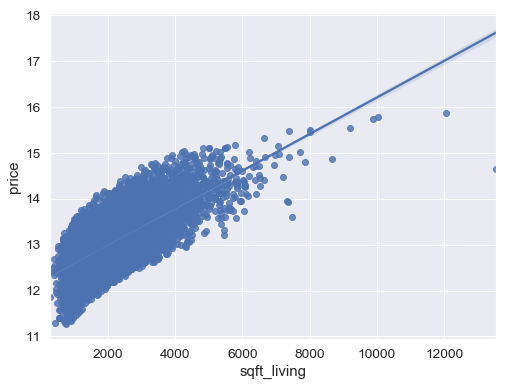

In [40]:
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

In [41]:
df_train.loc[df_train['sqft_living'] > 13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,8912,20140505T000000,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800.0


1) 다른 값들에 비해 sqft_living만 비정상적으로 크다.

2) grade와 다른 평수들을 살펴봐도 큰 의미가 없어보인다.

따라서 해당 값을 제거하도록 한다.

In [42]:
df_train = df_train.loc[df_train['id']!=8990]

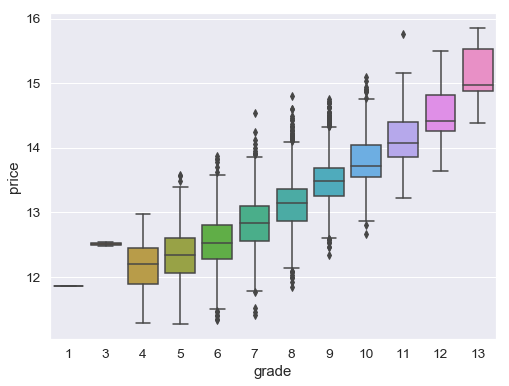

In [43]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [44]:
df_train.loc[(df_train['price']>12) & (df_train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12981.0
4123,4123,20141104T000000,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549.0


grade, sqft_ 모두 낮은 것을 볼 수 있다. 따라서 해당 값을 제거하도록 한다.

In [45]:
df_train.loc[(df_train['price']>14.7) & (df_train['grade'] == 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295.0


In [46]:
df_train.loc[(df_train['price']>15.5) & (df_train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449.0


In [47]:
df_train = df_train.loc[df_train['id']!=456]
df_train = df_train.loc[df_train['id']!=2302]
df_train = df_train.loc[df_train['id']!=4123]
df_train = df_train.loc[df_train['id']!=7259]
df_train = df_train.loc[df_train['id']!=2777]

### 2.1.3 bedrooms

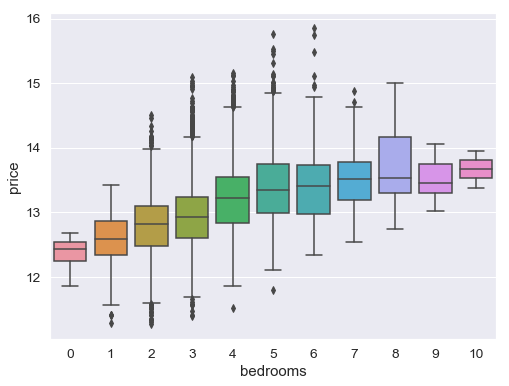

In [48]:
data = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

## 2.3 정규화

In [49]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    #df_test[c] = np.log1p(df_test[c].values)

tree 계열 모델은 정규화가 딱히 필요 없긴 함

In [50]:
df_train['date']

0        20141013T000000
1        20150225T000000
2        20150218T000000
3        20140627T000000
4        20150115T000000
              ...       
15030    20141014T000000
15031    20150326T000000
15032    20140521T000000
15033    20150223T000000
15034    20141015T000000
Name: date, Length: 15029, dtype: object

In [51]:
df_train['date'] = df_train['date'].apply(lambda x: x[0:8])
df_train['yr_renovated'] = df_train['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
df_train['yr_renovated'] = df_train['yr_renovated'].fillna(df_train['yr_built'])

In [52]:
df_train['date']

0        20141013
1        20150225
2        20150218
3        20140627
4        20150115
           ...   
15030    20141014
15031    20150326
15032    20140521
15033    20150223
15034    20141015
Name: date, Length: 15029, dtype: object

# 3. 변수 생성

In [53]:
# 변수 수정
df=df_train
df['date'] = df['date'].apply(lambda x: x[0:8])
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [54]:
# 방의 전체 갯수 
df_train['total_rooms'] = df_train['bedrooms'] + df_train['bathrooms'] #
    
# 거실의 비율 
df_train['sqft_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']    
df_train['sqft_total_size'] = df_train['sqft_above'] + df_train['sqft_basement']
    
# 면적 대비 거실의 비율 
df_train['sqft_ratio_1'] = df_train['sqft_living'] / df_train['sqft_total_size']
df_train['sqft_ratio15'] = df_train['sqft_living15'] / df_train['sqft_lot15'] 
    
# 재건축 여부 
df_train['is_renovated'] = df_train['yr_renovated'] - df_train['yr_built']
df_train['is_renovated'] = df_train['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
df_train['date'] = df_train['date'].astype('int')

df_train['per_price'] = df_train['price']/df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
df_train = pd.merge(df_train,zipcode_price,how='left',on='zipcode')
#df_train_test = pd.merge(df_train_test,zipcode_price,how='left',on='zipcode')

df_train['zipcode_mean'] = df_train['mean'] * df_train['sqft_total_size']
df_train['zipcode_var'] = df_train['var'] * df_train['sqft_total_size']
del df_train['mean']; del df_train['var']

# 4. Modeling

### 4.1 simple linear regression

In [55]:
train_columns = [c for c in df_train.columns if c not in ['id','price','per_price']]

model = sm.OLS(df_train['price'].values, df_train[train_columns])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.744e+06
Date:                Sat, 25 Jul 2020   Prob (F-statistic):                        0.00
Time:                        01:29:45   Log-Likelihood:                         -12.793
No. Observations:               15029   AIC:                                      75.59
Df Residuals:                   15004   BIC:                                      266.0
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [56]:
vif = pd.DataFrame()

vif["Features"] = df_train.columns
vif["VIF Values"] = [variance_inflation_factor(
    df_train.values, i) for i in range(df_train.shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

,Features,VIF Values
23,sqft_total_size,inf
21,total_rooms,inf
3,bedrooms,inf
4,bathrooms,inf
13,sqft_basement,inf
12,sqft_above,inf
16,zipcode,5.294289e+06
1,date,4.283878e+06
18,long,2.058245e+06
17,lat,2.440774e+05


일단 여기까지 했음!!

### 4.2 LightGBM

In [ ]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.015,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}

y_reg = df_train['price']

#prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(df_train))
#predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df_train.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)

In [ ]:
cv1 = np.sqrt(mean_squared_error(np.expm1(oof), np.expm1(y_reg)))
print(cv1)

In [ ]:
##plot the feature importance
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
df_oof = pd.DataFrame(oof)
df_y_reg = pd.DataFrame(y_reg)

data = pd.concat([df_oof, df_y_reg], axis=1)
data.columns = ['oof','y_reg']
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='oof', y="y_reg", data=data)

In [ ]:
data = pd.concat([df_oof, df_y_reg], axis=1)
data.columns = ['oof','y_reg']
data['error'] = data['y_reg'] - data['oof']
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='y_reg', y="error", data=data)

### Ensemble

In [ ]:
lgb1_oof = pd.DataFrame()
lgb1_oof['id'] = df_train.id
lgb1_oof['price'] = oof

lgb1_sub = pd.DataFrame()
lgb1_sub['id'] = df_test.id
lgb1_sub['price'] = predictions

cv1 = np.sqrt(mean_squared_error(np.expm1(oof), np.expm1(y_reg)))
print(cv1)

In [ ]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": 4,
         "random_state": 4950}

y_reg = np.expm1(df_train['price'])

#prepare fit model with cross-validation
folds = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train)):
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][train_columns], label=y_reg.iloc[trn_idx])#, categorical_feature=categorical_feats)
    val_data = lgb.Dataset(df_train.iloc[val_idx][train_columns], label=y_reg.iloc[val_idx])#, categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][train_columns], num_iteration=clf.best_iteration)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += clf.predict(df_test[train_columns], num_iteration=clf.best_iteration) / folds.n_splits
    
cv = np.sqrt(mean_squared_error(oof, y_reg))
print(cv)

In [ ]:
lgb2_oof = pd.DataFrame()
lgb2_oof['id'] = df_train.id
lgb2_oof['price'] = oof

lgb2_sub = pd.DataFrame()
lgb2_sub['id'] = df_test.id
lgb2_sub['price'] = predictions

cv2 = np.sqrt(mean_squared_error(oof, y_reg))
print(cv2)

In [ ]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

log_y_reg = np.log1p(y_reg)
print('Transform DMatrix...')
dtrain = xgb.DMatrix(df_train[train_columns], log_y_reg)
dtest = xgb.DMatrix(df_test[train_columns])

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=5000, early_stopping_rounds=50,verbose_eval=500, show_stdv=False)
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

model = xgb.train(xgb_params, dtrain, num_boost_round = rounds)
preds = model.predict(dtest)

xgb1_sub = df_test[['id']]
xgb1_sub['price'] = preds

In [ ]:
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

print('Transform DMatrix...')
dtrain = xgb.DMatrix(df_train[train_columns], y_reg)
dtest = xgb.DMatrix(df_test[train_columns])

print('Start Cross Validation...')

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=20000, early_stopping_rounds=50,verbose_eval=500, show_stdv=False)
print('best num_boost_rounds = ', len(cv_output))
rounds = len(cv_output)

model = xgb.train(xgb_params, dtrain, num_boost_round = rounds)
preds = model.predict(dtest)

xgb2_sub = df_test[['id']]
xgb2_sub['price'] = preds

In [ ]:
lgb_oof = pd.merge(lgb1_oof,lgb2_oof,how='left',on='id')
lgb_train = df_train[['id','price']]
lgb_oof = pd.merge(lgb_oof,lgb_train,how='left',on='id')
lgb_oof.columns = ['id','price1','price2','price']

lgb_ensemble = (0.9*np.expm1(lgb_oof['price1']) + 0.1*lgb_oof['price2']).values
cv = np.sqrt(mean_squared_error(lgb_ensemble, np.expm1(lgb_oof['price']).values))
print(cv)